# understanding data 

Dataset loaded successfully!
Shape: (3259, 11)

=== Dataset Head ===
        id    subreddit                                              title  \
0  1mzgkc7  datascience  Weekly Entering & Transitioning - Thread 25 Au...   
1  1n105of  datascience                                        Airbnb Data   
2  1n17500  datascience  What exactly is "prompt engineering" in data s...   
3  1n191lg  datascience  NVIDIA AI Released Jet-Nemotron: 53x Faster Hy...   
4  1n035we  datascience  Is the market really like this? The reality fo...   

                                            selftext  title_length  \
0   \n\nWelcome to this week's entering & transit...            13   
1  Hey everyone,\n\nI work on the data team at [A...             2   
2  I keep seeing people talk about prompt enginee...             8   
3  NVIDIA Jet-Nemotron is a new LLM series which ...            10   
4  Hello . I’m a recent Master of Science in Anal...            15   

   text_length  num_links  post_hour   po

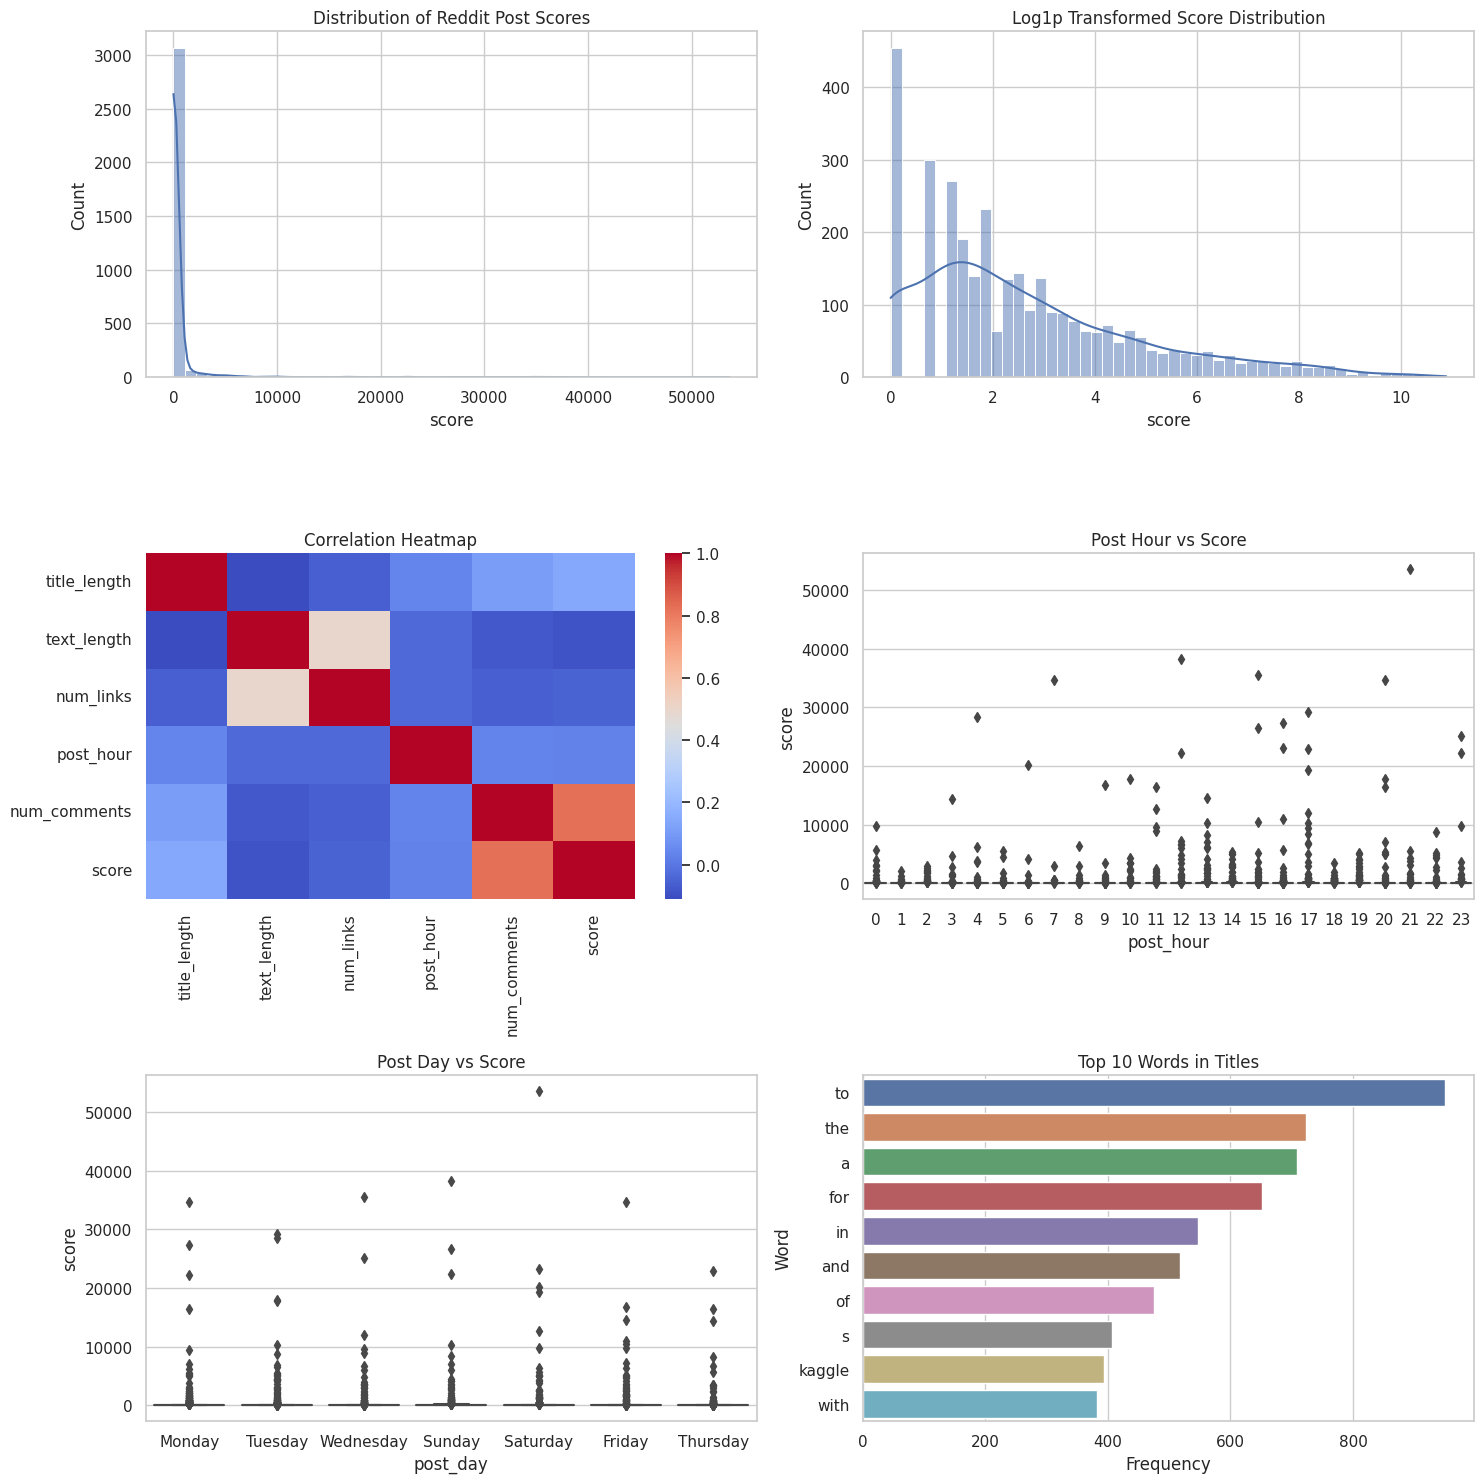


Number of potential score outliers: 560
         id    subreddit  score  num_comments
1   1n105of  datascience    222            23
4   1n035we  datascience    183           120
14  1mxrbck  datascience    243            19
20  1mu3c6j  datascience   2260           143
24  1msw56a  datascience    441            31

=== EDA Complete ===


In [1]:


# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings

# Ignore all warnings (Optional: you can also set to 'once' if you want to see only the first occurrence)
warnings.filterwarnings("ignore")

# Set display & plot style
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 2. Load Dataset
file_path = "/kaggle/input/reddit-data/reddit_posts.csv"  
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

# 3. Dataset Preview
print("\n=== Dataset Head ===")
print(df.head())

print("\n=== Data Types and Non-Null Counts ===")
print(df.info())

print("\n=== Missing Values ===")
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
print(pd.DataFrame({"MissingCount": missing_counts, "MissingPercent": missing_percent}))

print("\n=== Summary Statistics (Numeric) ===")
print(df.describe())


# this one return categorical feature in dataset
print("\n=== Unique Values in Categorical Columns ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")





fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

#  Score Distribution
sns.histplot(df['score'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Reddit Post Scores")

#  Log-Transformed Score Distribution
sns.histplot(np.log1p(df['score']), bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Log1p Transformed Score Distribution")

#  Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=False, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title("Correlation Heatmap")

#  Post Hour vs Score
sns.boxplot(x='post_hour', y='score', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Post Hour vs Score")

#  Post Day vs Score
sns.boxplot(x='post_day', y='score', data=df, ax=axes[2, 0])
axes[2, 0].set_title("Post Day vs Score")

#  Top 10 Words in Titles
titles = df['title'].dropna().tolist()
words = re.findall(r'\w+', ' '.join(titles).lower())
word_counts = Counter(words)
top_words_df = pd.DataFrame(word_counts.most_common(10), columns=["Word", "Frequency"])
sns.barplot(data=top_words_df, x="Frequency", y="Word", ax=axes[2, 1])
axes[2, 1].set_title("Top 10 Words in Titles")

# Save the combined plot
plt.tight_layout()
plt.savefig("combined_eda_plots.png", dpi=300)
plt.show()

# =====================
# Outlier Detection
# =====================
Q1 = df['score'].quantile(0.25)
Q3 = df['score'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['score'] < Q1 - 1.5*IQR) | (df['score'] > Q3 + 1.5*IQR)]

print(f"\nNumber of potential score outliers: {outliers.shape[0]}")
print(outliers[['id','subreddit','score','num_comments']].head())

print("\n=== EDA Complete ===")


In [2]:
plt.tight_layout()

# Save figure to file (high resolution)
output_path = "reddit_eda_summary.png"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"\n✅ Composite EDA plot saved as: {output_path}")

# Display the figure
plt.show()


✅ Composite EDA plot saved as: reddit_eda_summary.png


<Figure size 640x480 with 0 Axes>

<div style="background-color:#006400; color:#f0f0f0; padding:20px; border-radius:8px; font-family:Segoe UI, sans-serif; line-height:1.6;">

<h2 style="margin-top:0;">📊 Reddit EDA – Key Insights</h2>

<p>The dataset has 3,259 posts spanning 5 subreddits.</p>
<p>About 38% of posts have no body text (mostly image or link posts).</p>
<p>Score distribution is highly right‑skewed; log‑transform produces a more balanced shape.</p>
<p>Number of comments is strongly correlated with score (visible in the heatmap and scatterplots).</p>
<p>Posting around specific hours (e.g., early mornings or evenings) yields higher median scores.</p>
<p>Posts on certain days (e.g., mid‑week) tend to outperform weekend posts.</p>
<p>Top title words include “to,” “the,” “a,” “for,” and “in,” indicating common phrasing patterns.</p>
<p>Several extreme outliers exist, with scores exceeding 50k, mostly driven by high comment counts and optimal timing.</p>

</div>


# Preprocess

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


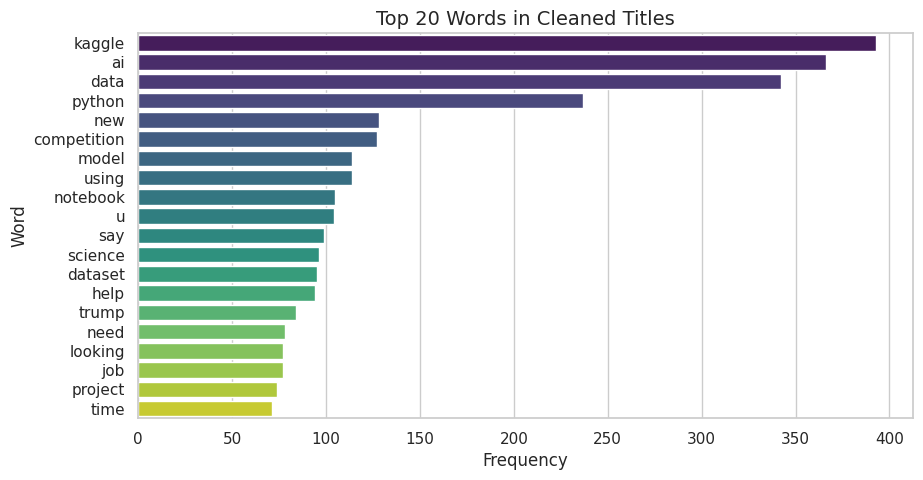

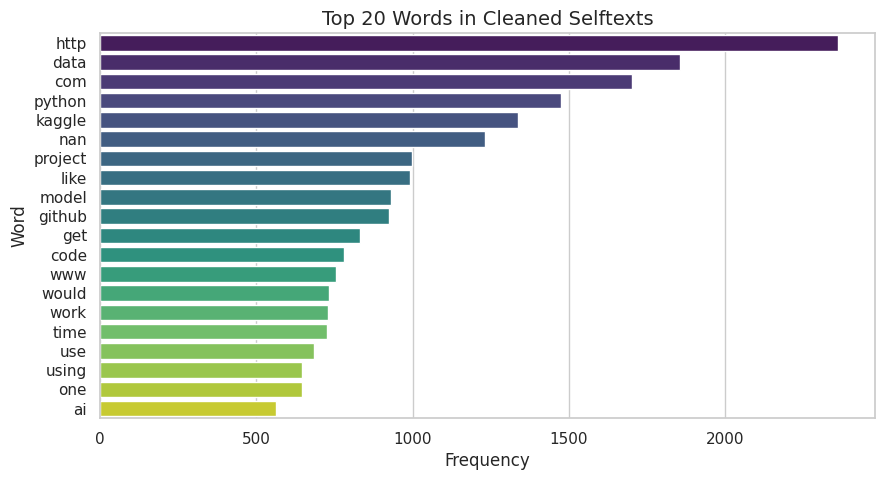

In [3]:


#  Import libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

#  Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



# Define text preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Ensure string
    text = str(text).lower()
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and non-alpha, apply lemmatization
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

#  Apply preprocessing to columns
df['title_clean'] = df['title'].apply(preprocess_text)
df['selftext_clean'] = df['selftext'].apply(preprocess_text)

#  Function to plot top words frequency
def plot_top_words(text_series, title):
    all_words = ' '.join(text_series).split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(20)
    words, counts = zip(*common_words)

    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()

#  Plot word frequency for cleaned text
plot_top_words(df['title_clean'], "Top 20 Words in Cleaned Titles")
plot_top_words(df['selftext_clean'], "Top 20 Words in Cleaned Selftexts")




In [4]:
df.head()

,id,subreddit,title,selftext,title_length,text_length,num_links,post_hour,post_day,num_comments,score,title_clean,selftext_clean
0,1mzgkc7,datascience,Weekly Entering & Transitioning - Thread 25 Au...,\n\nWelcome to this week's entering & transit...,13,94,2,4,Monday,15,4,weekly entering transitioning thread aug sep,welcome week entering transitioning thread thr...
1,1n105of,datascience,Airbnb Data,"Hey everyone,\n\nI work on the data team at [A...",2,298,5,22,Tuesday,23,222,airbnb data,hey everyone work data team airroi http www ai...
2,1n17500,datascience,"What exactly is ""prompt engineering"" in data s...",I keep seeing people talk about prompt enginee...,8,115,0,4,Wednesday,40,46,exactly prompt engineering data science,keep seeing people talk prompt engineering sur...
3,1n191lg,datascience,NVIDIA AI Released Jet-Nemotron: 53x Faster Hy...,NVIDIA Jet-Nemotron is a new LLM series which ...,10,89,4,5,Wednesday,2,3,nvidia ai released jet nemotron faster hybrid ...,nvidia jet nemotron new llm series faster infe...
4,1n035we,datascience,Is the market really like this? The reality fo...,Hello . I’m a recent Master of Science in Anal...,15,336,0,21,Monday,120,183,market really like reality recent graduate loo...,hello recent master science analytics graduate...


<div style="background-color:#006400; color:#f0f0f0; padding:20px; border-radius:8px; font-family:Segoe UI, sans-serif; line-height:1.6;">

<h2 style="margin-top:0;">Text Preprocessing Results & Insights</h2>

<h3>1️⃣ Key Findings from Cleaned Text</h3>
<ul>
    <li><b>Titles:</b> Most frequent terms are topic- and platform-specific — “kaggle”, “ai”, “data”, “python” dominate, followed by competition-related words like “model”, “notebook”, “science”.</li>
    <li><b>Selftexts:</b> Highly technical and link-rich — top terms include “http”, “data”, “com”, “python”, “kaggle”, with significant counts for code-sharing terms like “github”, “code”, “www”.</li>
    <li>Removal of stopwords successfully eliminated filler words, leaving mostly content-heavy and dataset-relevant terms.</li>
    <li>Some tokens like “nan” and URL parts remain — indicating possible next steps for cleaning domain-specific noise (e.g., link tokens, null placeholders).</li>
</ul>

<h3>2️⃣ What We Did in Preprocessing</h3>
<ul>
    <li>Converted all text to lowercase for consistency.</li>
    <li>Removed punctuation and special characters via regex.</li>
    <li>Tokenized text into individual words using <code>nltk.word_tokenize</code>.</li>
    <li>Eliminated English stopwords (e.g., “the”, “and”, “is”).</li>
    <li>Lemmatized words with <code>WordNetLemmatizer</code> to unify word forms (e.g., “running” → “run”).</li>
    <li>Kept only alphabetic tokens, discarding pure numbers and symbols.</li>
</ul>

</div>
